In [44]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [45]:
!kaggle datasets download -d trainingdatapro/gender-detection-and-classification-image-dataset

gender-detection-and-classification-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
import zipfile
zip_ref=zipfile.ZipFile('/content/gender-detection-and-classification-image-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization,Dropout

In [48]:
#Generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(246,246)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(246,246)
)

Found 7844 files belonging to 55 classes.
Found 345 files belonging to 55 classes.


In [49]:
# we are normalizing whole image pixels into range b/w 0-1
def normalize(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(normalize)
validation_ds=validation_ds.map(normalize)

In [56]:
#CNN Model building
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(246,246,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(246,246,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(246,246,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


model.add(Dropout(0.1))
model.add(BatchNormalization())


In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 244, 244, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 244, 244, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 122, 122, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 120, 120, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 120, 120, 64)      256       
 chNormalization)                                                
                                                      

In [171]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
246/246 [==============================] - 31s 126ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0145
Epoch 2/10
246/246 [==============================] - 31s 125ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0145
Epoch 3/10
246/246 [==============================] - 31s 122ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0145
Epoch 4/10
246/246 [==============================] - 32s 128ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0145
Epoch 5/10
246/246 [==============================] - 32s 128ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0145
Epoch 6/10
246/246 [==============================] - 32s 128ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0145
Epoch 7/10
246/246 [==============================] - 31s 125ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0145
Epoch 8/10
246/246 [=======

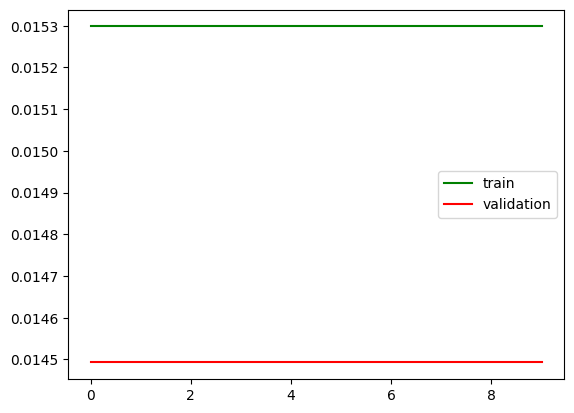

In [172]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

In [173]:
import cv2

In [174]:
test_img=cv2.imread('/content/download.jpeg')

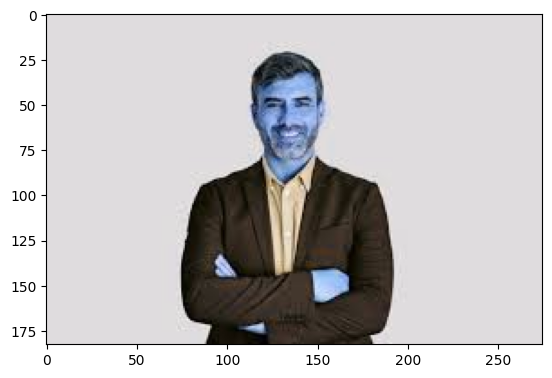

In [175]:
plt.imshow(test_img)

In [176]:
test_img.shape

(183, 275, 3)

In [177]:
test_img = cv2.resize(test_img,(246,246))

In [178]:
test_input = test_img.reshape((1,246,246,3))

In [179]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[nan]], dtype=float32)

In [181]:
test_img2=cv2.imread('/content/woman.jpeg')

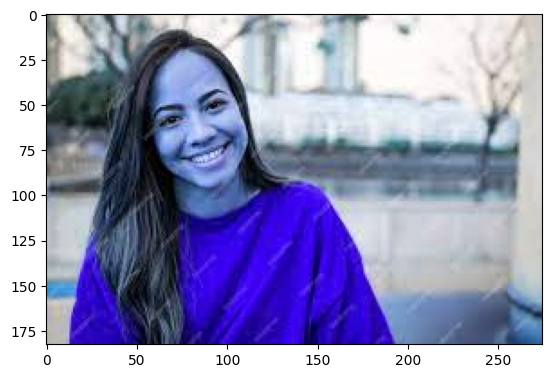

In [182]:
plt.imshow(test_img2)

In [193]:
test_img2.shape
test_img2 = cv2.resize(test_img,(246,246))
test_input2 = test_img2.reshape((1,246,246,3))
result=model.predict(test_input2)

1/1 [==============================] - 0s 20ms/step


In [216]:
print(result)

nan
